### 추세추종 : 상승 추세에 매수하고 하락 추세에 매도하는 기법
- 🔼 매수 : 주가가 상단 밴드에 접근하며, 지표가 강세를 확증할 때만 매수 (%b가 0.8보다 크고, MFI가 80보다 클 때)
- 🔽 매도 : 주가가 하단 밴드에 접근하며, 지표가 약세를 확증할 때만 매수 (%b가 0.2보다 작고, MFI가 20보다 작을 때)

end_date is initialized to '2021-01-07'


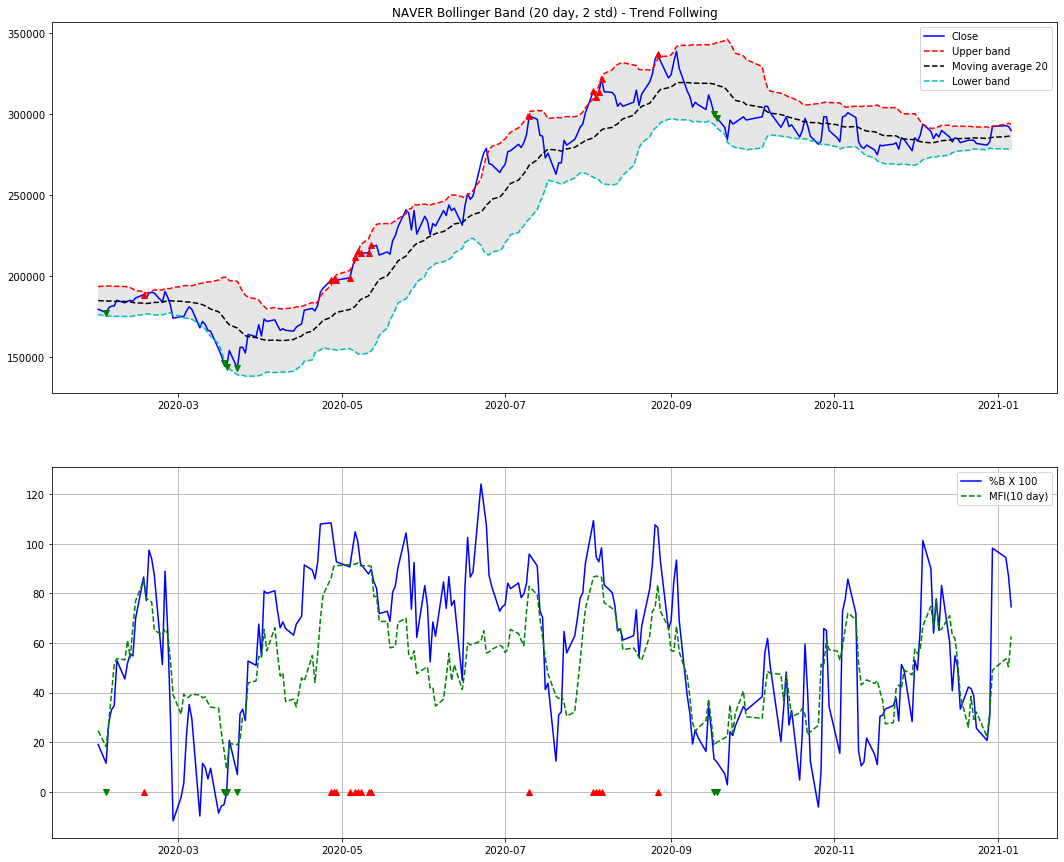

In [3]:
import matplotlib.pyplot as plt

import sys
sys.path.append('C:/Users/PPP/PycharmProjects/StockPriceAPI/Investar')
from Analyzer import MarketDB

mk = MarketDB()
df = mk.get_daily_price('NAVER', '2020-01-01')

df['MA20'] = df['close'].rolling(window=20).mean()   
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev']*2)   
df['lower'] = df['MA20'] - (df['stddev']*2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])
df['TP'] = (df['high'] + df['low'] + df['close']) / 3
df['PMF'] = 0
df['NMF'] = 0
for i in range(len(df.close)-1):
    if df.TP.values[i] < df.TP.values[i+1]:
        df.PMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.NMF.values[i+1] = 0
    else:
        df.NMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.PMF.values[i+1] = 0
df['MFR'] = df.PMF.rolling(window=10).sum() / df.NMF.rolling(window=10).sum()
df['MFI10'] = 100 - 100 / (1+df['MFR'])
df = df[19:]

plt.figure(figsize=(18,15))
plt.subplot(211)
plt.title('NAVER Bollinger Band (20 day, 2 std) - Trend Follwing')
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], df.close.values[i], 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], df.close.values[i], 'gv')
        
plt.legend(loc='best')

plt.subplot(212)
plt.plot(df.index, df['PB']*100, color='b', label='%B X 100')
plt.plot(df.index, df['MFI10'], 'g--', label='MFI(10 day)')
plt.yticks([-20,0,20,40,60,80,100,120])
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], 0, 'gv')
plt.grid(True)
plt.legend(loc='best')
plt.show()

-------

### 반전 : 주가가 반전하는 지점을 찾아내 매수 또는 매도하는 기법
- 🔼매수 : 주가가 하단 밴드 부근에서 W형 패턴을 나타내고, 강세지표가 확증할 때 매수 (%b가 0.05보다 작고 II%가 0보다 크면 매수)
- 🔽매도 : 상단 밴드 부근에서 일련의 주가 태그가 일어나며, 약세 지표가 확증할 때 매도 (%b가 0.95보다 크고 II%가 0보다 작으면 매수)

end_date is initialized to '2021-01-07'


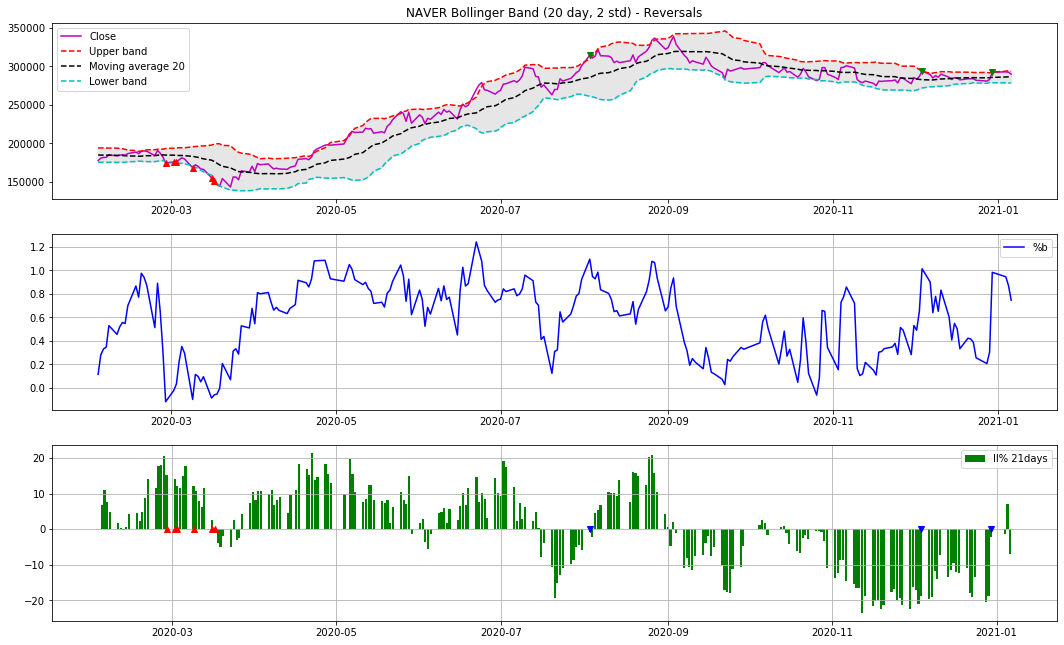

In [6]:
import matplotlib.pyplot as plt

import sys
sys.path.append('C:/Users/PPP/PycharmProjects/StockPriceAPI/Investar')
from Analyzer import MarketDB

mk = MarketDB()
df = mk.get_daily_price('NAVER', '2020-01-01')

df['MA20'] = df['close'].rolling(window=20).mean()   
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev']*2)   
df['lower'] = df['MA20'] - (df['stddev']*2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])

df['II'] = (2 * df['close'] - df['high'] - df['low']) / (df['high'] - df['low']) * df['volume']
df['IIP21'] = df['II'].rolling(window=21).sum() / df['volume'].rolling(window=21).sum()*100
df = df.dropna()

plt.figure(figsize=(18,11))
plt.subplot(311)
plt.title('NAVER Bollinger Band (20 day, 2 std) - Reversals')
plt.plot(df.index, df['close'], 'm', label='Close')
plt.plot(df.index, df['upper'], 'r--', label='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], df.close.values[i], 'r^')
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], df.close.values[i], 'gv')
plt.legend(loc='best')

plt.subplot(312)
plt.plot(df.index, df['PB'], color='b', label='%b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(313)
plt.bar(df.index, df['IIP21'], color='g', label='II% 21days')
for i in range(len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc='best')
plt.show()